<a href="https://colab.research.google.com/github/thidark/Machine-Learning-Python-/blob/main/2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving ex2data1.txt to ex2data1.txt
Saving ex2data2.txt to ex2data2.txt


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv('/content/ex2data1.txt',header=None)

In [7]:
df

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [8]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [9]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [10]:
x=df.iloc[:,:-1].values

In [11]:
x

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [12]:
x.shape

(100, 2)

In [13]:
y=df.iloc[:,-1].values

In [14]:
y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [15]:
y.shape

(100,)

In [16]:
y=y.reshape(100,1)

In [17]:
y.shape

(100, 1)

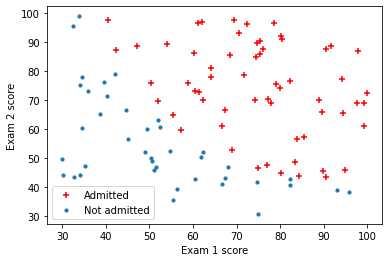

In [20]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(x[pos[:,0],0],x[pos[:,0],1],c="r",marker="+")
plt.scatter(x[neg[:,0],0],x[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

Cost Function For Logistic Regression
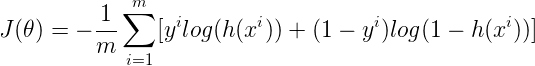

Gradient Descent


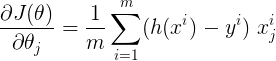



1.2   Implementation
1.2.1  Warmup exercise: sigmoid function

Before you start with the actual cost function, recall that the logistic regression hypothesis is deﬁned as:

hθ(x) = g(θT x),

where function g is the sigmoid function. The sigmoid function is deﬁned as:

 g(z) = 1/(1 + e−z ).

Means value of x for each column

In [27]:
mu=np.mean(x,axis=0)  

Standard Deviation of each column

In [28]:
std=np.std(x,axis=0)

In [29]:
mu.shape

(2,)

In [30]:
def feactureNormalization(x):
  mean=np.mean(x,axis=0)
  std=np.std(x,axis=0)
  x_norm=(x-mean)/std

  return x_norm,mean,std

In [31]:
x,x_mean,x_std=feactureNormalization(x)

In [32]:
x

array([[-1.60224763,  0.63834112],
       [-1.82625564, -1.2075414 ],
       [-1.53903969,  0.3612943 ],
       [-0.28210129,  1.0863683 ],
       [ 0.69152826,  0.49337794],
       [-1.06199728, -0.5357394 ],
       [-0.23437234,  1.63818413],
       [ 0.4845113 , -1.06373024],
       [ 0.53998666,  1.14651105],
       [ 0.97044832, -1.22709853],
       [ 1.56075461, -1.51418452],
       [ 0.48393864, -1.92641626],
       [ 0.86065022,  0.55490359],
       [ 0.1921582 ,  1.70347834],
       [-1.34839922,  0.53082781],
       [-0.60293429,  1.24314792],
       [ 0.17694982, -0.72913975],
       [ 0.11893077, -1.05699346],
       [ 0.25914553,  1.44433023],
       [ 0.58543944, -1.00845873],
       [ 0.0892403 , -1.26468472],
       [ 1.2413042 , -0.02285779],
       [-0.78042096, -0.93923898],
       [-1.62350714, -1.19053019],
       [ 0.63426559,  0.14875155],
       [-0.17423248,  0.20186768],
       [ 0.75131151, -1.15742514],
       [ 1.41886056, -1.4830648 ],
       [-0.19700066,

In [33]:
x_mean

array([65.64427406, 66.22199809])

In [34]:
x_std

array([19.36068671, 18.48963567])

In [35]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [36]:
sigmoid(0)

0.5

In [39]:
m,n=x.shape[0], x.shape[1]
m


100

In [40]:
n

2

Adding 1 values column to x feacture matrix

In [42]:
x=np.append(np.ones((m,1)),x,axis=1)

In [43]:
x

array([[ 1.        , -1.60224763,  0.63834112],
       [ 1.        , -1.82625564, -1.2075414 ],
       [ 1.        , -1.53903969,  0.3612943 ],
       [ 1.        , -0.28210129,  1.0863683 ],
       [ 1.        ,  0.69152826,  0.49337794],
       [ 1.        , -1.06199728, -0.5357394 ],
       [ 1.        , -0.23437234,  1.63818413],
       [ 1.        ,  0.4845113 , -1.06373024],
       [ 1.        ,  0.53998666,  1.14651105],
       [ 1.        ,  0.97044832, -1.22709853],
       [ 1.        ,  1.56075461, -1.51418452],
       [ 1.        ,  0.48393864, -1.92641626],
       [ 1.        ,  0.86065022,  0.55490359],
       [ 1.        ,  0.1921582 ,  1.70347834],
       [ 1.        , -1.34839922,  0.53082781],
       [ 1.        , -0.60293429,  1.24314792],
       [ 1.        ,  0.17694982, -0.72913975],
       [ 1.        ,  0.11893077, -1.05699346],
       [ 1.        ,  0.25914553,  1.44433023],
       [ 1.        ,  0.58543944, -1.00845873],
       [ 1.        ,  0.0892403 , -1.264

In [44]:
x.shape

(100, 3)

In [45]:
initial_theta=np.zeros((n+1,1))

In [46]:
initial_theta

array([[0.],
       [0.],
       [0.]])

In [47]:
z=np.dot(x,initial_theta)

In [49]:
h=sigmoid(z)

In [51]:
h.shape

(100, 1)

In [52]:
l=-y*np.log(h)-(1-y)*np.log(1-h)

In [53]:
l.shape

(100, 1)

In [55]:
cost=np.sum(l)/m

In [56]:
cost

0.6931471805599453

In [58]:
grad=np.dot(x.transpose(),(h-y))/m

In [60]:
grad

array([[-0.1       ],
       [-0.28122914],
       [-0.25098615]])